In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [1]:
df = pd.read_csv('D:\Python_Solution\Weather_project\Weather_Model_website\Data\weather.csv')
df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Dell\AppData\Local\Temp\ipykernel_26296\3433966722.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Python_Solution\Weather_project\Weather_Model_website\Data\weather.csv')
C:\Users\Dell\AppData\Local\Temp\ipykernel_26296\3433966722.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Python_Solution\Weather_project\Weather_Model_website\Data\weather.csv')


NameError: name 'pd' is not defined

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
max,181960.0,29.837277,4.571345,4.0,28.0,31.0,33.0,46.0
min,181960.0,23.277874,3.945381,2.0,21.0,24.0,26.0,32.0
wind,181960.0,11.038657,5.311807,1.0,7.0,10.0,14.0,54.0
rain,181960.0,6.567130,13.602055,0.0,0.1,1.8,7.5,596.4
humidi,181960.0,77.083068,9.288553,23.0,71.0,78.0,83.0,100.0
cloud,181960.0,41.721268,23.875067,0.0,23.0,38.0,58.0,100.0
pressure,181960.0,1010.229127,4.635714,988.0,1008.0,1010.0,1012.0,1038.0


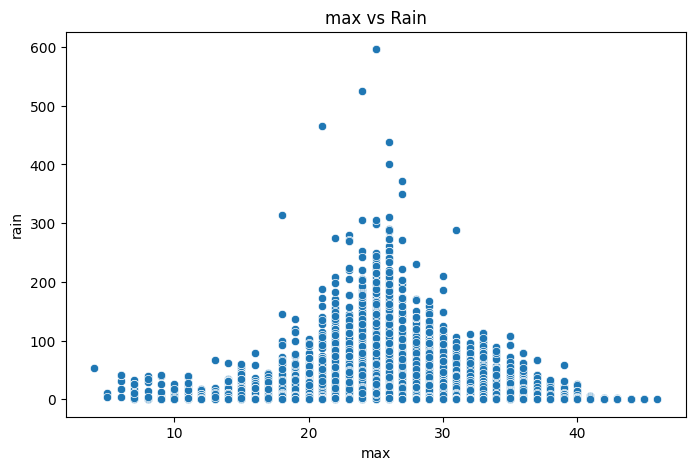

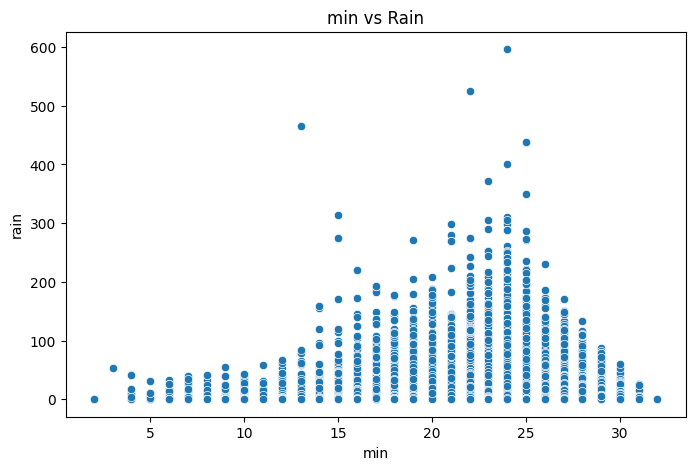

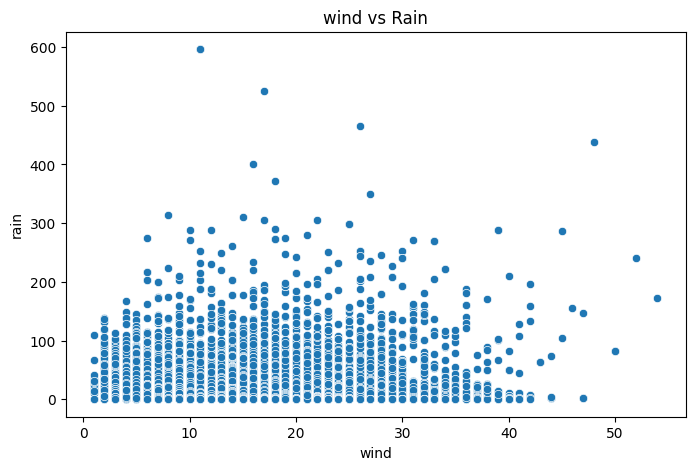

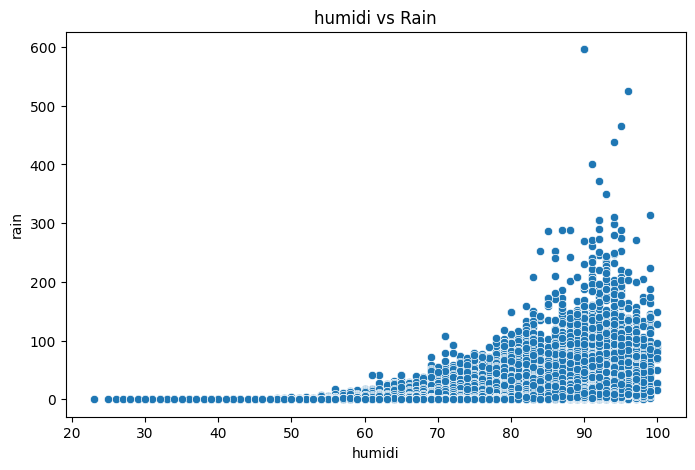

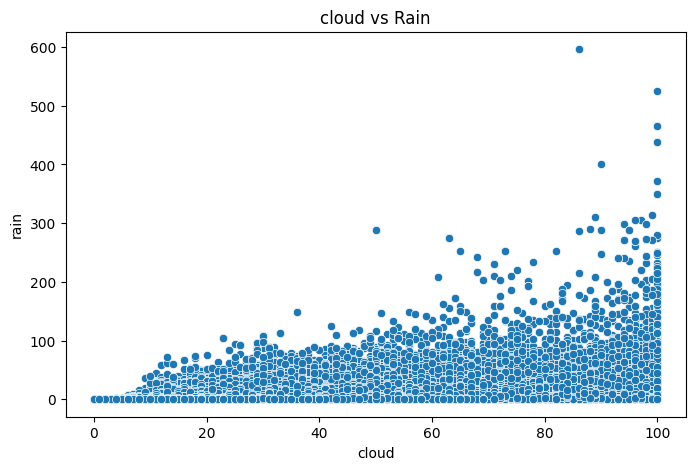

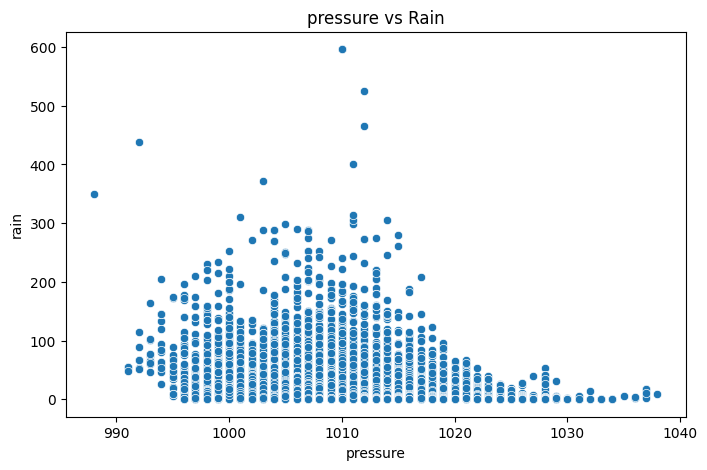

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['max', 'min', 'wind', 'humidi', 'cloud', 'pressure']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=feature, y='rain', data=df)
    plt.title(f'{feature} vs Rain')
    plt.show()


In [5]:
print(df.isnull().sum())

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64


Thực hiện gán Label cho khu vực

In [6]:
df['province'] = df['province'].replace(['Hanoi', 'Ha Noi'], 'Ha Noi')

In [7]:
# Define the mapping of cities to regions
city_to_region = {
    'Bac Lieu': 'Southern',
    'Ho Chi Minh City': 'Southern',
    'Tam Ky': 'Central',
    'Ben Tre': 'Southern',
    'Hoa Binh': 'Northern',
    'Tan An': 'Southern',
    'Bien Hoa': 'Southern',
    'Hong Gai': 'Northern',
    'Thai Nguyen': 'Northern',
    'Buon Me Thuot': 'Central',
    'Hue': 'Central',
    'Thanh Hoa': 'Northern',
    'Ca Mau': 'Southern',
    'Long Xuyen': 'Southern',
    'Tra Vinh': 'Southern',
    'Cam Pha': 'Northern',
    'My Tho': 'Southern',
    'Tuy Hoa': 'Central',
    'Cam Ranh': 'Central',
    'Nam Dinh': 'Northern',
    'Uong Bi': 'Northern',
    'Can Tho': 'Southern',
    'Nha Trang': 'Central',
    'Viet Tri': 'Northern',
    'Chau Doc': 'Southern',
    'Phan Rang': 'Central',
    'Vinh': 'Central',
    'Da Lat': 'Central',
    'Phan Thiet': 'Southern',
    'Vinh Long': 'Southern',
    'Ha Noi': 'Northern',
    'Play Cu': 'Central',
    'Vung Tau': 'Southern',
    'Hai Duong': 'Northern',
    'Qui Nhon': 'Central',
    'Yen Bai': 'Northern',
    'Hai Phong': 'Northern',
    'Rach Gia': 'Southern',
    'Soc Trang': 'Southern'
}


In [8]:
regions = df.province.map(city_to_region)
df['region'] = regions
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date,region
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01,Southern
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01,Southern
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01,Southern
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01,Southern
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01,Southern


Xử lý các giá trị ngoại biên

In [9]:
df['z_score'] = (df['rain'] - df['rain'].mean()) / df['rain'].std()

data_no_outliers = df[(df['z_score'] < 3) & (df['z_score'] > -3)]

df = data_no_outliers.drop('z_score', axis=1)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
max,178871.0,29.882580,4.577175,5.0,28.0,31.0,33.0,46.0
min,178871.0,23.273555,3.956429,2.0,21.0,24.0,26.0,32.0
wind,178871.0,11.003399,5.242161,1.0,7.0,10.0,14.0,47.0
rain,178871.0,5.335159,8.173734,0.0,0.1,1.7,7.0,47.3
humidi,178871.0,76.883223,9.208457,23.0,71.0,78.0,83.0,100.0
cloud,178871.0,41.215591,23.596516,0.0,23.0,37.0,57.0,100.0
pressure,178871.0,1010.281091,4.613239,993.0,1008.0,1010.0,1013.0,1038.0


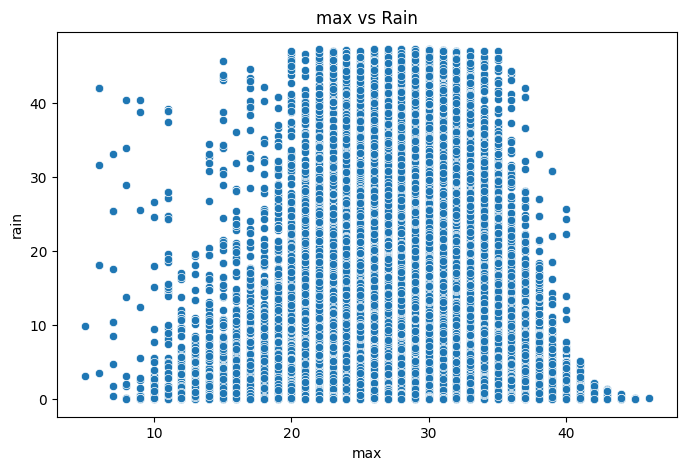

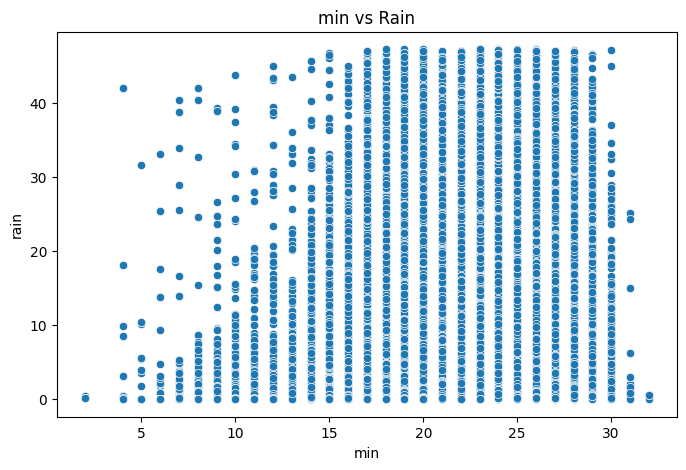

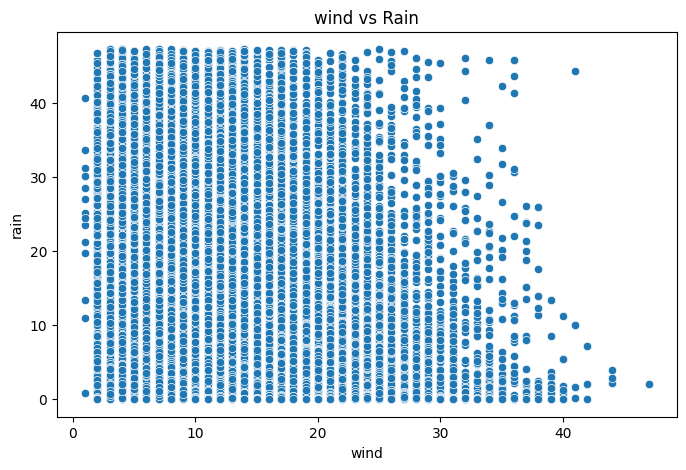

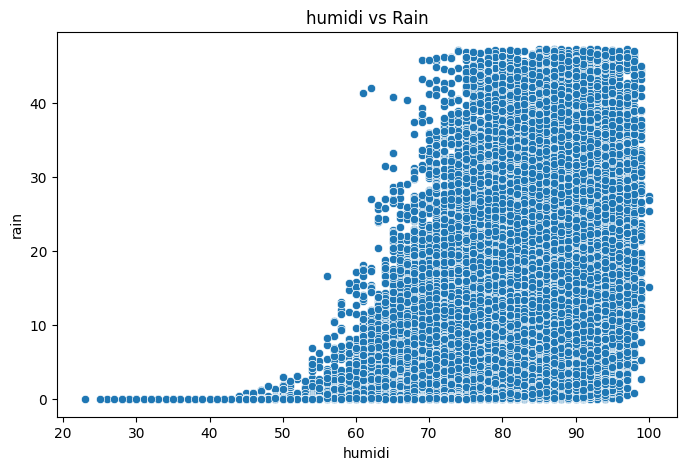

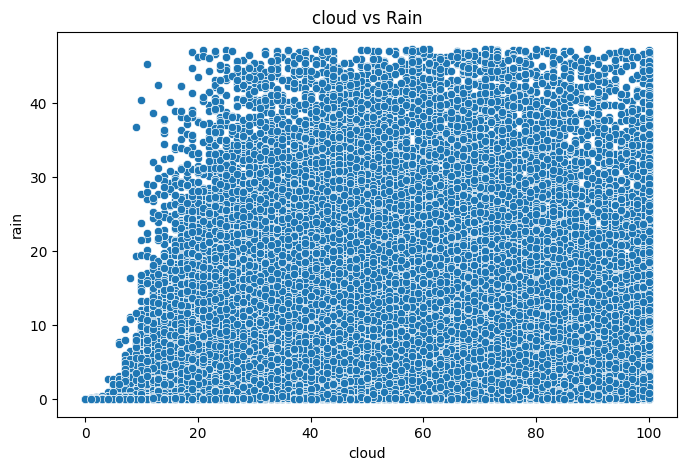

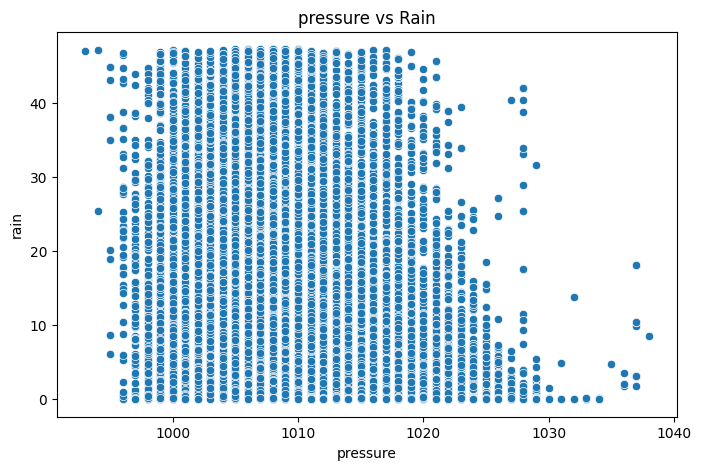

In [11]:
datafeatures = ['max', 'min', 'wind', 'humidi', 'cloud', 'pressure']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=feature, y='rain', data=df)
    plt.title(f'{feature} vs Rain')
    plt.show()

In [12]:
label_encoder_province = LabelEncoder()
label_encoder_region = LabelEncoder()
df['region'] = label_encoder_province.fit_transform(df['region'])


df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date,region
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01,2
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01,2
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01,2
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01,2
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01,2


Convert Wind_d to numberic

In [13]:
le = LabelEncoder()
df['wind_d'] = le.fit_transform(df['wind_d'])

In [14]:
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date,region
0,Bac Lieu,27,22,17,5,6.9,90,71,1010,2009-01-01,2
1,Bac Lieu,31,25,20,1,0.0,64,24,1010,2010-01-01,2
2,Bac Lieu,29,24,14,0,0.0,75,45,1008,2011-01-01,2
3,Bac Lieu,30,24,30,0,0.0,79,52,1012,2012-01-01,2
4,Bac Lieu,31,25,20,1,0.0,70,24,1010,2013-01-01,2


In [15]:
output = 'D:\Python_Solution\Weather_project\Data\Data_For_model\Dataset_for_RF.csv'
df.to_csv(output, index=False)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Dell\AppData\Local\Temp\ipykernel_25232\2663100037.py:1: SyntaxWarning: invalid escape sequence '\P'
  output = 'D:\Python_Solution\Weather_project\Data\Data_For_model\Dataset_for_RF.csv'
